Imports and setup


In [2]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
data = np.load('../data/processed_gestures.npz')

X_train, y_train = data['X_train'], data['y_train']
X_val, y_val = data["X_val"], data["y_val"]
X_test, y_test = data["X_test"], data["y_test"]


# Train classifire

In [4]:
clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

clf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# Evaluate on validation set

In [7]:
y_val_pred = clf.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)
print(f" Validation Accuracy: {val_acc:.2%}")

 Validation Accuracy: 97.80%


# Evaluate on

In [8]:
y_test_pred = clf.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print(f" Test Accuracy:{ test_acc:.2%}")

 Test Accuracy:97.25%


In [9]:
print("\nDetailed Report:\n")
print(classification_report(y_test, y_test_pred))


Detailed Report:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        78
           1       1.00      0.97      0.99        71
           2       1.00      0.91      0.95        33

   micro avg       0.97      0.97      0.97       182
   macro avg       0.98      0.96      0.97       182
weighted avg       0.97      0.97      0.97       182
 samples avg       0.97      0.97      0.97       182



# Confussion Matrix

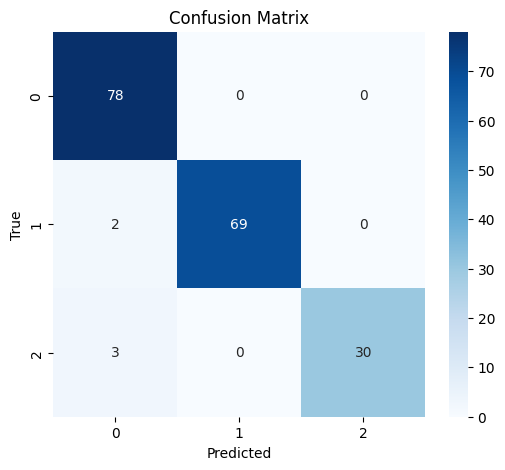

In [12]:
plt.figure(figsize=(6,5))
# Convert from one-hot to integer labels
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_test_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
os.makedirs("../models", exist_ok=True)
joblib.dump(clf, "../models/randomForest_classifier.pkl")